# Curva do esquecimento de Ebbinghaus

$$
b = 100 \frac{1.84}{(\log_{10} t)^{1.25} + 1.84}
$$

onde $t$ é o tempo, em minutos, medido após a memorização de um tópico. $b$ é "savings", ou a capacidade de retenção. Está relacionado ao tempo necessário para re-lembrar
todos os itens em um conjunto após certo tempo. Quanto maior o "savings", mais rápido é a re-lembrança.
É expressa em %, com 100% indicando o mesmo tempo inicial para se lembrar das coisas, 25% significando
que foi necessário 75% mais tempo para se relembrar de tudo.


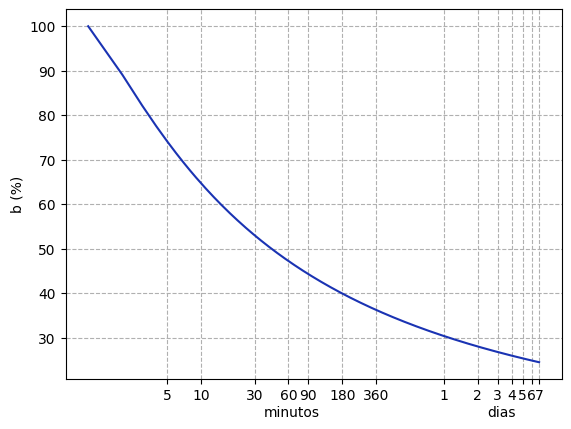

In [1]:
import matplotlib.pyplot as plt
import palettable
import numpy as np


def ebbinghaus_b(t, a=1.84, b=1.25):
    """
    Curva de esquecimento de Ebbinghaus, com t em minutos. As constantes a e b podem ser alteradas, mas tem o valor
    padrão de 1.84 e 1.25.
    """
    return 100 * a / (np.log10(t) ** b + a)


t = np.linspace(1, 60 * 24 * 7, num=10000)  # 1 semana
b = ebbinghaus_b(t)

plt.figure()
plt.gca().set_prop_cycle("color", palettable.scientific.sequential.Imola_3.mpl_colors)
plt.plot(t, b)
plt.xscale("log")
plt.xticks(
    ticks=np.concatenate([[5, 10, 30, 60, 90, 180, 360], np.arange(1, 8, 1) * 60 * 24]),
    labels=[5, 10, 30, 60, 90, 180, 360, 1, 2, 3, 4, 5, 6, 7],
)
plt.xticks(ticks=[], labels=[], minor=True)
plt.text(0.4, -0.10, "minutos", transform=plt.gca().transAxes)
plt.text(0.85, -0.10, "dias", transform=plt.gca().transAxes)
plt.ylabel("b (%)")
plt.grid(ls="--")

plt.savefig("imagens/ebbinghaus.png")